In [ ]:
!pip install transformers
!pip install datasets
!pip install bertviz
!pip install umap-learn
!pip install weave

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.5/157.5 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 135.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 88.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd

In [ ]:
from datasets import load_dataset

ds = load_dataset("dair-ai/emotion", "split")

In [ ]:
ds

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [ ]:
ds.set_format(type="pandas")

In [ ]:
ds['train'][:]

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,3


In [ ]:
ds['test'][:]

,text,label
0,im feeling rather rotten so im not very ambiti...,0
1,im updating my blog because i feel shitty,0
2,i never make her separate from me because i do...,0
3,i left with my bouquet of red and yellow tulip...,1
4,i was feeling a little vain when i did this one,0
...,...,...
1995,i just keep feeling like someone is being unki...,3
1996,im feeling a little cranky negative after this...,3
1997,i feel that i am useful to my people and that ...,1
1998,im feeling more comfortable with derby i feel ...,1


In [ ]:
df = ds['train'][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [ ]:
ds['train'].features

{'text': Value('string'),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])}

In [ ]:
classes = ds['train'].features['label'].names
classes

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

In [ ]:
df['label_name'] = df['label'].apply(lambda x: classes[x])
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df['label_name'].value_counts()

,count
label_name,
joy,5362
sadness,4666
anger,2159
fear,1937
love,1304
surprise,572


/tmp/ipython-input-641832642.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['label_name'], palette="viridis", order=df['label_name'].value_counts(ascending=False).index)


<Axes: xlabel='count', ylabel='label_name'>

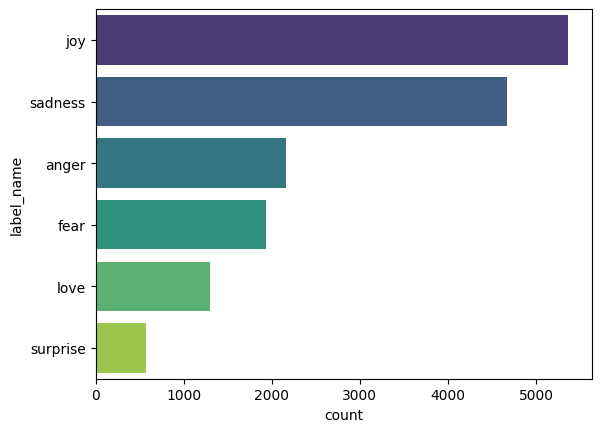

In [ ]:
sns.countplot(df['label_name'], palette="viridis", order=df['label_name'].value_counts(ascending=False).index)

In [ ]:
df['text'].str.split().apply(len)

,text
0,4
1,21
2,10
3,18
4,4
...,...
15995,24
15996,20
15997,6
15998,14


In [ ]:
max(df['text'].str.split().apply(len))

66

In [ ]:
df['total_words'] = df['text'].str.split().apply(len)

<Axes: title={'center': 'total_words'}, xlabel='label_name'>

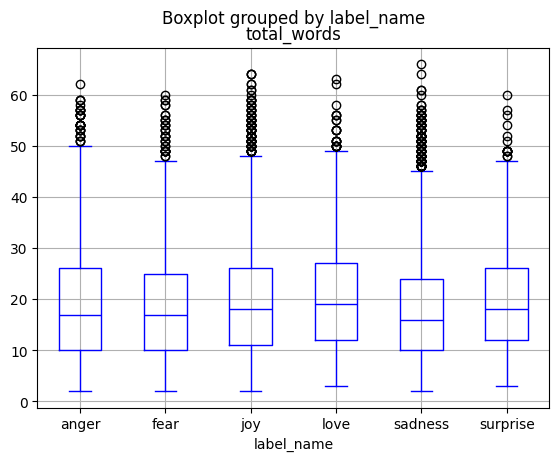

In [ ]:
df.boxplot(column='total_words', by='label_name', grid=True, showfliers=True, color='blue')

In [ ]:
from transformers import AutoTokenizer

model_ckpt = "distilbert/distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [ ]:
tokenizer("I am learning GENAI and i am enjoying it")

{'input_ids': [101, 1045, 2572, 4083, 8991, 4886, 1998, 1045, 2572, 9107, 2009, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
tokenizer.batch_decode(sequences=[101, 1045, 2572, 4083, 8991, 4886, 1998, 1045, 2572, 9107, 2009, 102])

['[CLS]',
 'i',
 'am',
 'learning',
 'gen',
 '##ai',
 'and',
 'i',
 'am',
 'enjoying',
 'it',
 '[SEP]']

In [ ]:
tokens = tokenizer.convert_ids_to_tokens(tokenizer("I am learning AI").input_ids)
print(tokens)

['[CLS]', 'i', 'am', 'learning', 'ai', '[SEP]']


In [ ]:
tokenizer.vocab_size

30522

In [ ]:
tokenizer.model_max_length

512

In [ ]:
ds.reset_format()

In [ ]:
ds

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [ ]:
def tokenize(batch):
  temp = tokenizer(batch['text'], padding=True, truncation=True)
  return temp

In [ ]:
print(tokenize(ds['train'][:5]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102], [101, 10047, 9775, 1037, 3371, 2000, 2695, 1045, 2514, 20505, 3308, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2572, 2412, 3110, 16839, 9080, 12863, 2055, 1996, 13788, 1045, 2097, 2113, 2008, 2009, 2003, 2145, 2006, 1996, 3200, 102, 0], [101, 1045, 2572, 3110, 24665, 7140, 11714, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]}


In [ ]:
ds_encoded = ds.map(tokenize, batched=True, batch_size=None)

In [ ]:
ds_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [ ]:
text = "I am learning GENAI and i am enjoying it"

In [ ]:
inputs = tokenizer(text, return_tensors="pt")
inputs

{'input_ids': tensor([[ 101, 1045, 2572, 4083, 8991, 4886, 1998, 1045, 2572, 9107, 2009,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [ ]:
from transformers import AutoModel
import torch

model_ckpt = "distilbert/distilbert-base-uncased"
model = AutoModel.from_pretrained(model_ckpt)

In [ ]:
model

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): DistilBertSdpaAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): L

In [ ]:
with torch.no_grad():
  outputs = model(**inputs)

last_hidden_states = outputs.last_hidden_state

In [ ]:
outputs

BaseModelOutput(last_hidden_state=tensor([[[ 0.0656, -0.0957,  0.0268,  ..., -0.0051,  0.2962,  0.3149],
         [ 0.3244, -0.0101, -0.0250,  ..., -0.0844,  0.5477,  0.2529],
         [ 0.0524,  0.3001,  0.3007,  ...,  0.0408,  0.3093,  0.4494],
         ...,
         [ 0.0946,  0.0348,  0.5763,  ...,  0.0210,  0.0511, -0.0825],
         [-0.2955, -0.2863,  0.1902,  ...,  0.2284, -0.0917, -0.0264],
         [ 0.9612,  0.2899, -0.1549,  ...,  0.1772, -0.6561, -0.3120]]]), hidden_states=None, attentions=None)

In [ ]:
last_hidden_states

tensor([[[ 0.0656, -0.0957,  0.0268,  ..., -0.0051,  0.2962,  0.3149],
         [ 0.3244, -0.0101, -0.0250,  ..., -0.0844,  0.5477,  0.2529],
         [ 0.0524,  0.3001,  0.3007,  ...,  0.0408,  0.3093,  0.4494],
         ...,
         [ 0.0946,  0.0348,  0.5763,  ...,  0.0210,  0.0511, -0.0825],
         [-0.2955, -0.2863,  0.1902,  ...,  0.2284, -0.0917, -0.0264],
         [ 0.9612,  0.2899, -0.1549,  ...,  0.1772, -0.6561, -0.3120]]])

In [ ]:
last_hidden_states.shape

torch.Size([1, 12, 768])

In [ ]:
from transformers import AutoModelForSequenceClassification

num_labels = len(classes)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TrainingArguments

batch_size = 64
model_name = "distilbert_fine_tuned_for_emotion"

In [ ]:
training_args = TrainingArguments(
    output_dir=model_name,
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=5,
    weight_decay=0.01,
    eval_strategy="epoch",
    disable_tqdm=False
)

In [ ]:
training_args

TrainingArguments(
_n_gpu=1,
accelerator_config={'split_batches': False, 'dispatch_batches': None, 'even_batches': True, 'use_seedable_sampler': True, 'non_blocking': False, 'gradient_accumulation_kwargs': None, 'use_configured_state': False},
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
average_tokens_across_devices=True,
batch_eval_metrics=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_persistent_workers=False,
dataloader_pin_memory=True,
dataloader_prefetch_factor=None,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_do_concat_batches=True,
eval_on_start=False,
eval_steps=None,
eval_strategy=IntervalStrategy.EPOCH,
eval_use_gather_object=False,

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average="weighted")
  recall = recall_score(labels, preds, average="weighted")
  precision = precision_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)
  return {"accuracy": acc, "f1": f1, "recall": recall, "precision": precision}

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=ds_encoded["train"],
    eval_dataset=ds_encoded["validation"],
    processing_class = tokenizer
)

In [ ]:
import wandb
from google.colab import userdata
import weave

WANDB_API_KEY = userdata.get('WANDB_API_KEY')
wandb.login(key=WANDB_API_KEY)
weave.init('arpitkadam/Distilbert')

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


Output()

weave: wandb version 0.23.1 is available!  To upgrade, please run:
weave:  $ pip install wandb --upgrade
weave: Logged in as Weights & Biases user: arpitkadam922.
weave: View Weave data at https://wandb.ai/arpitkadam/Distilbert/weave


In [ ]:
trainer.train()

weave: wandb version 0.23.1 is available!  To upgrade, please run:
weave:  $ pip install wandb --upgrade
weave: Logged in as Weights & Biases user: arpitkadam922.
weave: View Weave data at https://wandb.ai/arpitkadam/huggingface/weave


Epoch,Training Loss,Validation Loss,Accuracy,F1,Recall,Precision
1,No log,0.281067,0.913500,0.914051,0.913500,0.915771
2,0.516800,0.178950,0.932500,0.932522,0.932500,0.934139
3,0.516800,0.158514,0.936500,0.937489,0.936500,0.940464


Epoch,Training Loss,Validation Loss,Accuracy,F1,Recall,Precision
1,No log,0.281067,0.913500,0.914051,0.913500,0.915771
2,0.516800,0.178950,0.932500,0.932522,0.932500,0.934139
3,0.516800,0.158514,0.936500,0.937489,0.936500,0.940464
4,0.121800,0.143081,0.936500,0.936557,0.936500,0.937099
5,0.121800,0.140448,0.935500,0.935807,0.935500,0.936442


TrainOutput(global_step=1250, training_loss=0.2734397766113281, metrics={'train_runtime': 690.319, 'train_samples_per_second': 115.888, 'train_steps_per_second': 1.811, 'total_flos': 1800857154240000.0, 'train_loss': 0.2734397766113281, 'epoch': 5.0})

In [ ]:
pred_outputs = trainer.predict(ds_encoded["test"])
pred_outputs.metrics

{'test_loss': 0.1552886664867401,
 'test_accuracy': 0.9255,
 'test_f1': 0.9255693750726748,
 'test_recall': 0.9255,
 'test_precision': 0.9259773268740518,
 'test_runtime': 4.2988,
 'test_samples_per_second': 465.245,
 'test_steps_per_second': 7.444}

In [ ]:
pred_outputs.predictions

array([[ 5.974332  , -1.1203736 , -1.7685225 , -0.9559974 , -1.7722957 ,
        -1.7956114 ],
       [ 6.082464  , -1.1348673 , -1.7595326 , -1.0693771 , -1.6735327 ,
        -1.9231328 ],
       [ 6.049386  , -1.2652409 , -1.5385916 , -1.4740065 , -1.3523248 ,
        -1.8280609 ],
       ...,
       [-1.2271628 ,  6.260054  , -0.65685856, -1.6638812 , -1.9840593 ,
        -1.3132062 ],
       [-1.1060576 ,  6.1470494 , -0.9274532 , -1.64888   , -1.6186049 ,
        -1.4064    ],
       [-1.7268945 , -1.9331053 , -1.7195733 , -2.229428  ,  2.8419015 ,
         2.8268747 ]], dtype=float32)

In [ ]:
import numpy as np
y_preds = np.argmax(pred_outputs.predictions, axis=1)
y_true = ds_encoded['test'][:]['label']

In [ ]:
from sklearn.metrics import classification_report

print(classes)
print(classification_report(y_true, y_preds, target_names=classes))

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
              precision    recall  f1-score   support

     sadness       0.96      0.97      0.97       581
         joy       0.95      0.93      0.94       695
        love       0.78      0.84      0.81       159
       anger       0.93      0.93      0.93       275
        fear       0.90      0.91      0.90       224
    surprise       0.77      0.70      0.73        66

    accuracy                           0.93      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.93      0.93      0.93      2000



In [ ]:
text

'I am learning GENAI and i am enjoying it'

In [ ]:
input_encoded = tokenizer(text, return_tensors="pt").to(device)

with torch.no_grad():
  output = model(**input_encoded)

In [ ]:
output

SequenceClassifierOutput(loss=None, logits=tensor([[-1.7789,  4.9918,  1.6503, -1.8578, -2.6714, -1.6102]],
       device='cuda:0'), hidden_states=None, attentions=None)

In [ ]:
pred = output.logits.argmax(-1)
classes[pred]

'joy'

In [ ]:
def predict_class(text):
  input_encoded = tokenizer(text, return_tensors="pt").to(device)

  with torch.no_grad():
    output = model(**input_encoded)

  pred = output.logits.argmax(-1)
  return classes[pred]

In [ ]:
text = "I am hungry"
predict_class(text)

'anger'